In [5]:
import json
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import os
plt.ion()
from shapely.geometry import Point, Polygon
import geopandas as gpd
from rasterio.plot import show
import sys
import geojson
from descartes import PolygonPatch

plt.rcParams['figure.figsize'] = (8, 8)


# Prettier plotting with seaborn
import seaborn as sns; 
sns.set(font_scale=1.5)
sns.set_style("white")

## RGB-PanSharpen

3 Channels, 3x16 bit, 30 cm resolition


In [14]:
#spacenet_sample/AOI_2_Vegas_Train/RGB-PanSharpen/RGB-PanSharpen_AOI_2_Vegas_img1265.tif

direct = "AOI_2_Vegas_Train/RGB-PanSharpen"
file  ="/RGB-PanSharpen_AOI_2_Vegas_img998.tif"


it has 3 channels of (650, 650) width x height


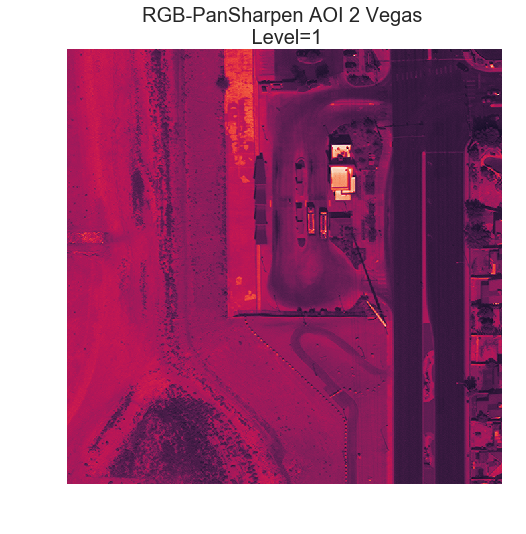

In [17]:
direct = '/Users/akushwaha/work/Project-Python/spacenet-dataset/AOI_2_Vegas/AOI_2_Vegas_Train/RGB-PanSharpen'
# '        spacenet-dataset/AOI_2_Vegas/AOI_2_Vegas_Train/RGB-PanSharpen'
file = '/RGB-PanSharpen_AOI_2_Vegas_img998.tif'

level= 1

with rio.open(direct+file, "r") as src:
    PanSharpen=src.read(level,masked=True)
    spatial_extent = rio.plot.plotting_extent(src)
    array = src.read()
    print('it has',array.shape[0],'channels of',array.shape[1:3],'width x height')

    
fig, ax = plt.subplots(figsize = (8,8))

plt.imshow(PanSharpen, 
     extent=spatial_extent)

ax.set_title("RGB-PanSharpen AOI 2 Vegas \n Level={}".format(level), 
             fontsize=20);
ax.set_axis_off()
#spatial_extent = plotting_extent(lidar_chm)

## PAN
Panchromatic, single channel, 16-bit Grayscale, 30 cm Resolution

In [18]:
#spacenet_sample/AOI_2_Vegas_Train/PAN/PAN_AOI_2_Vegas_img1265.tif
direct2 = 'spacenet-dataset/AOI_2_Vegas/AOI_2_Vegas_Train.tar.gz/AOI_2_Vegas_Train/PAN'
file2  ="/PAN_AOI_2_Vegas_img1000.tif"

level= 1
with rio.open(direct2+file2, "r") as src2:
    PAN=src2.read(level,masked=True)
    spatial_extent = rio.plot.plotting_extent(src2)
    array = src2.read()
    print('it has',array.shape[0],'channels of',array.shape[1:3],'width x height')


fig, ax = plt.subplots(figsize = (8,8))

plt.imshow(PAN, 
     extent=spatial_extent,
          cmap='Greys')

ax.set_title("PAN AOI 2 Vegas \n Level={}".format(level), 
             fontsize=20);
ax.set_axis_off()
#spatial_extent = plotting_extent(lidar_chm)

RasterioIOError: spacenet-dataset/AOI_2_Vegas/AOI_2_Vegas_Train.tar.gz/AOI_2_Vegas_Train/PAN/PAN_AOI_2_Vegas_img1000.tif: No such file or directory

## MUL-PanSharpen
Sharpen version of the PAN, 8 Channels, 30 cm of resolution, 8x16 bit

it has 8 channels of (650, 650) width x height


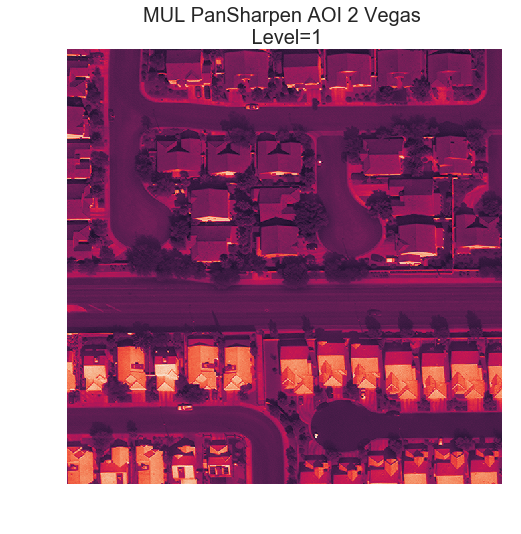

In [112]:
#spacenet_sample/AOI_2_Vegas_Train/MUL-PanSharpen/MUL-PanSharpen_AOI_2_Vegas_img1265.tif
direct3="AOI_2_Vegas_Train/MUL-PanSharpen"
file3  ="/MUL-PanSharpen_AOI_2_Vegas_img1265.tif"
level= 1
with rio.open(direct3+file3, "r") as src3:
    MUL_sharpen=src3.read(level,masked=True)
    spatial_extent = rio.plot.plotting_extent(src3)
    array = src3.read()
    print('it has',array.shape[0],'channels of',array.shape[1:3],'width x height')

    
fig, ax = plt.subplots(figsize = (8,8))

plt.imshow(MUL_sharpen, 
     extent=spatial_extent)

ax.set_title("MUL PanSharpen AOI 2 Vegas \n Level={}".format(level), 
             fontsize=20);
ax.set_axis_off()
#spatial_extent = plotting_extent(lidar_chm)

## MUL
8 bands, multichannel, 8x16 bit, 1-2 m of resolution

it has 8 channels of (163, 163) width x height


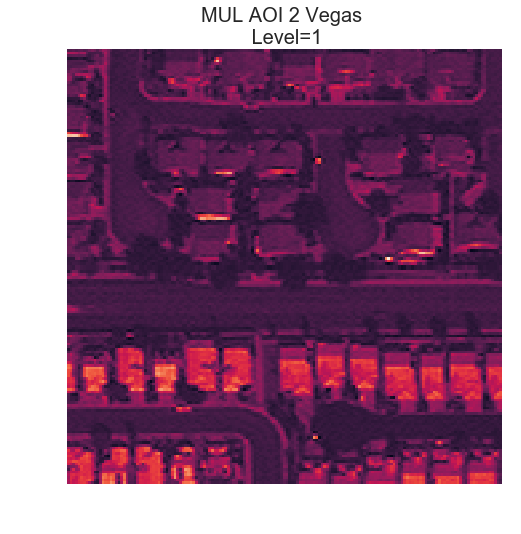

In [114]:



#spacenet_sample/AOI_2_Vegas_Train/MUL/MUL_AOI_2_Vegas_img1265.tif
direct4="AOI_2_Vegas_Train/MUL"
file4  ="/MUL_AOI_2_Vegas_img1265.tif"
level= 1
with rio.open(direct4+file4, "r") as src4:
    MUL=src4.read(level,masked=True)
    spatial_extent = rio.plot.plotting_extent(src4)
    array = src4.read()
    print('it has',array.shape[0],'channels of',array.shape[1:3],'width x height')

    
fig, ax = plt.subplots(figsize = (8,8))

plt.imshow(MUL, 
     extent=spatial_extent)

ax.set_title("MUL AOI 2 Vegas \n Level={}".format(level), 
             fontsize=20);
ax.set_axis_off()
#spatial_extent = plotting_extent(lidar_chm)

In [156]:
print(src.name.split('/')[1],'res=',src.res)
print(src2.name.split('/')[1],'res=',src2.res)
print(src3.name.split('/')[1],'res=',src3.res)
print(src4.name.split('/')[1],'res=',src4.res)

RGB-PanSharpen res= (2.7000000000043656e-06, 2.700000153853265e-06)
PAN res= (2.7000000000043656e-06, 2.700000153853265e-06)
MUL-PanSharpen res= (2.7000000000043656e-06, 2.700000153853265e-06)
MUL res= (1.076687116566158e-05, 1.0766871779169461e-05)


In [175]:
# accordint to the data we have a res of 30 cm for three sets of images and 1 m for the Pan images
conv=10e04
print('I use this conversion=',conv)
print(src4.name.split('/')[1],src4.res[0]*conv,'m')
print(src.name.split('/')[1],src.res[0]*conv,'m')

# each image covers 200mx200m at the ground
Sground=200 
# for example RGB-PanSharpen
Res_approx=Sground/src.height
print('Approx Res=',Res_approx)


I use this conversion= 100000.0
MUL 1.076687116566158 m
RGB-PanSharpen 0.27000000000043656 m
Approx Res= 0.3076923076923077


In [157]:
print(src.name.split('/')[1],src.bounds)
print(src2.name.split('/')[1],src2.bounds)
print(src3.name.split('/')[1],src3.bounds)
print(src4.name.split('/')[1],src4.bounds)


RGB-PanSharpen BoundingBox(left=-115.2724176, bottom=36.1879676998, right=-115.2706626, top=36.1897226999)
PAN BoundingBox(left=-115.2724176, bottom=36.1879676998, right=-115.2706626, top=36.1897226999)
MUL-PanSharpen BoundingBox(left=-115.2724176, bottom=36.1879676998, right=-115.2706626, top=36.1897226999)
MUL BoundingBox(left=-115.2724176, bottom=36.1879676998, right=-115.2706626, top=36.1897226999)


In [85]:
src.meta

{'count': 3,
 'crs': CRS.from_dict(init='epsg:4326'),
 'driver': 'GTiff',
 'dtype': 'uint16',
 'height': 650,
 'nodata': None,
 'transform': Affine(2.7000000000043656e-06, 0.0, -115.2724176,
        0.0, -2.700000153853265e-06, 36.1897226999),
 'width': 650}

## geojson files

In [226]:
#spacenet_sample/AOI_2_Vegas_Train/geojson/buildings/buildings_AOI_2_Vegas_img1265.geojson
direct5="AOI_2_Vegas_Train/geojson/buildings"
file5  ="/buildings_AOI_2_Vegas_img1265.geojson"

json_data = gpd.read_file(direct5+file5)
json_data.head(3)
json_data.describe()



,OBJECTID,FID_VEGAS_,Id,FID_Vegas,AREA,Shape_Leng,Shape_Le_1,SISL,OBJECTID_1,Shape_Le_2,Shape_Le_3,Shape_Area,partialBuilding,partialDec
count,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.000000,49.0,49.000000,49.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000584,0.0,0.428571,0.867977
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000102,0.0,0.500000,0.220708
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000083,0.0,0.000000,0.124372
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000548,0.0,0.000000,0.841902
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000597,0.0,0.000000,1.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000653,0.0,1.000000,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000728,0.0,1.000000,1.000000


In [270]:
# json_data.bounds
a=np.array(json_data.bounds.iloc[0])

b=[]
for i in src4.bounds:
    b.append(i)

print('bounds of raster',b)
print('bounds of json_data',a)

bounds of raster [-115.2724176, 36.1879676998, -115.2706626, 36.1897226999]
bounds of json_data [-115.27078972   36.1879677  -115.27067462   36.18810215]


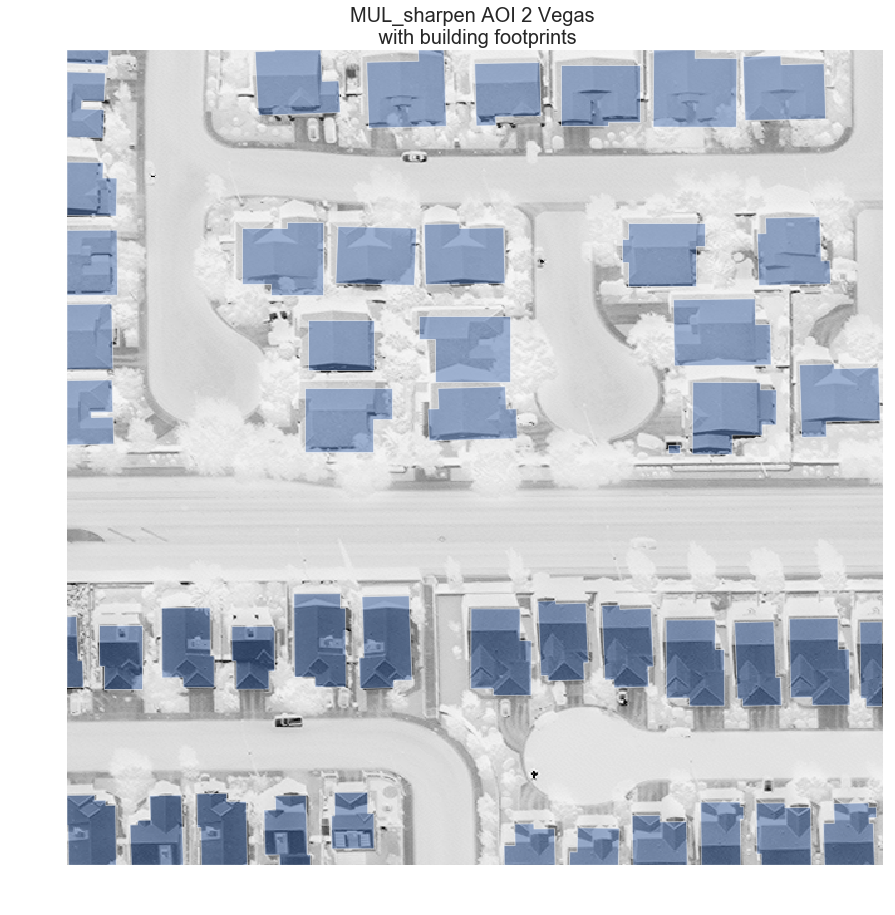

In [224]:
fig, ax = plt.subplots(figsize = (15,15))
im=MUL_sharpen;imname='MUL_sharpen'
#im=PAN;imname='PAN'
#im=PanSharpen;imname='PanSharpen'
#im=MUL;imname='MUL'

rec=plt.imshow(im, 
     extent=spatial_extent,
              cmap='Greys')
json_data.plot(ax=ax,
             alpha=0.5)



ax.set_title('{} AOI 2 Vegas \n with building footprints'.format(imname), 
             fontsize=20);

ax.set_axis_off()